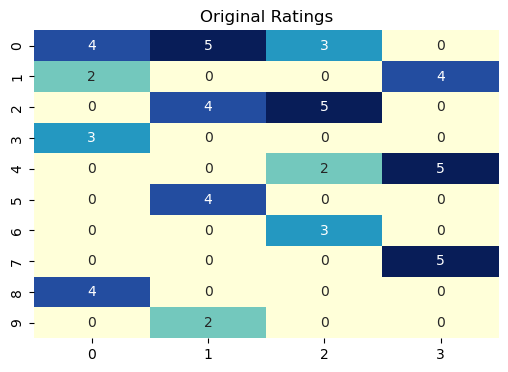

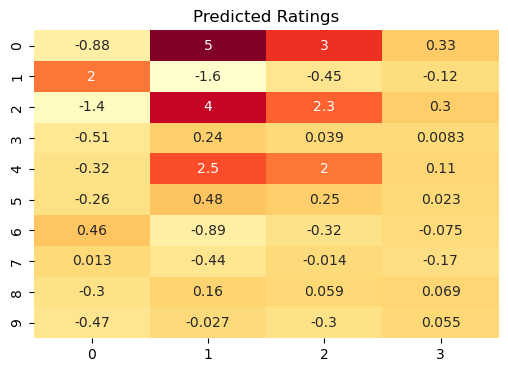

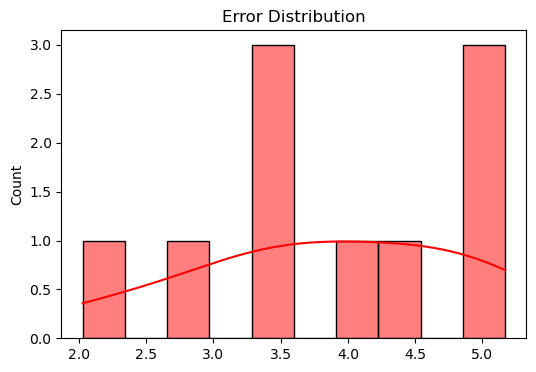

RMSE: 3.9641910446642226
MAE : 3.845731169818135
Predicted rating for User 1 on Movie 20: 4.985416556915501


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = {
    'userID': [1,1,1,2,2,3,3,4,5,5,6,7,8,9,10],
    'movieID': [10,20,30,10,40,20,30,10,30,40,20,30,40,10,20],
    'rating':  [4, 5, 3, 2, 4, 4, 5, 3, 2, 5, 4, 3, 5, 4, 2]
}
ratings_df = pd.DataFrame(data)

user_item_matrix = ratings_df.pivot_table(index='userID', columns='movieID', values='rating')
R = user_item_matrix.fillna(0).values

train_matrix = R.copy()
test_matrix = np.zeros(R.shape)

np.random.seed(42)
for user in range(R.shape[0]):
    non_zero_items = R[user, :].nonzero()[0]
    if len(non_zero_items) > 0:
        test_indices = np.random.choice(non_zero_items, size=max(1, len(non_zero_items)//5), replace=False)
        train_matrix[user, test_indices] = 0
        test_matrix[user, test_indices] = R[user, test_indices]

num_users, num_items = train_matrix.shape
k = 5
np.random.seed(42)
P = np.random.normal(scale=1./k, size=(num_users, k))
Q = np.random.normal(scale=1./k, size=(num_items, k))

steps = 500
alpha = 0.01
reg = 0.01

for step in range(steps):
    for i in range(num_users):
        for j in range(num_items):
            if train_matrix[i, j] > 0:
                error = train_matrix[i, j] - np.dot(P[i, :], Q[j, :].T)
                P[i, :] += alpha * (error * Q[j, :] - reg * P[i, :])
                Q[j, :] += alpha * (error * P[i, :] - reg * Q[j, :])

pred_matrix = np.dot(P, Q.T)

y_true = test_matrix[test_matrix.nonzero()].flatten()
y_pred = pred_matrix[test_matrix.nonzero()].flatten()

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(R, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Original Ratings")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(pred_matrix, annot=True, cmap="YlOrRd", cbar=False)
plt.title("Predicted Ratings")
plt.show()

errors = y_true - y_pred
plt.figure(figsize=(6,4))
sns.histplot(errors, bins=10, kde=True, color="red")
plt.title("Error Distribution")
plt.show()

print("RMSE:", rmse)
print("MAE :", mae)

user_id = 0
movie_id = 1
print("Predicted rating for User 1 on Movie 20:", pred_matrix[user_id, movie_id])
